### Statistical Thinking in Python (Part 1)

#### Thinking probabilistically

In [1]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

** Generating Random numbers **

(array([ 10024.,   9990.,  10041.,   9930.,   9949.,  10061.,  10116.,
          9984.,  10079.,   9826.]),
 array([  5.53667574e-06,   1.00004187e-01,   2.00002838e-01,
          3.00001488e-01,   4.00000139e-01,   4.99998789e-01,
          5.99997440e-01,   6.99996091e-01,   7.99994741e-01,
          8.99993392e-01,   9.99992042e-01]),
 <a list of 10 Patch objects>)

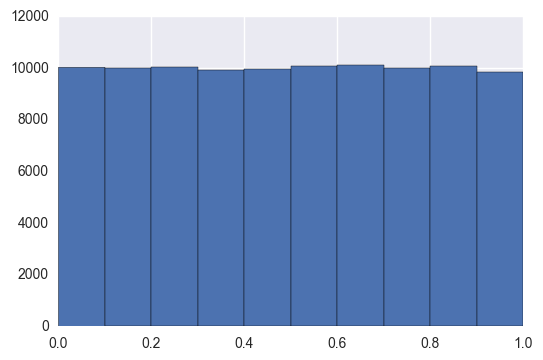

In [3]:
np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
plt.hist(random_numbers)

** perform_bernoulli_trials ** - check the probability of Success

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    
    n_success=0
    for i in range(n):
        random_no = np.random.random()
        if random_no < p:
            n_success += 1
    return n_success

(array([ 0.00322581,  0.01354839,  0.03129032,  0.05451613,  0.07129032,
         0.06709677,  0.05129032,  0.02129032,  0.00677419,  0.00225806]),
 array([ 35. ,  38.1,  41.2,  44.3,  47.4,  50.5,  53.6,  56.7,  59.8,
         62.9,  66. ]),
 <a list of 10 Patch objects>)

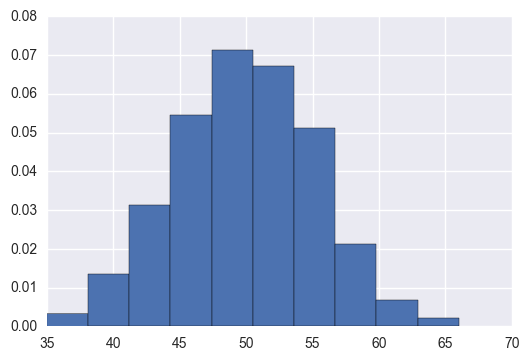

In [6]:
# checking tuhe probability of getting 0.5 value per 100

np.random.seed(42)
n_success = np.empty(1000)
for i in range(1000):
    n_success[i] = perform_bernoulli_trials(100, 0.5)
    
plt.hist(n_success, normed=True)

In [7]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

[49 52 44 42]


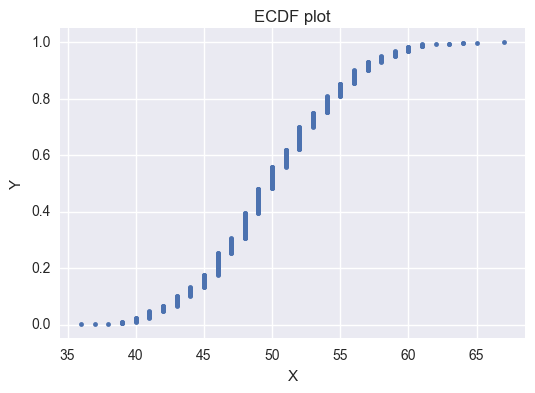

(array([ 0.00322581,  0.01354839,  0.03129032,  0.05451613,  0.07129032,
         0.06709677,  0.05129032,  0.02129032,  0.00677419,  0.00225806]),
 array([ 35. ,  38.1,  41.2,  44.3,  47.4,  50.5,  53.6,  56.7,  59.8,
         62.9,  66. ]),
 <a list of 10 Patch objects>)

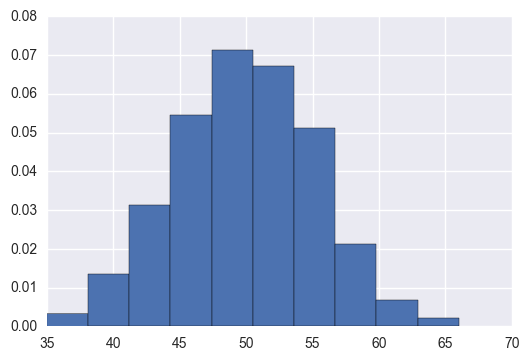

In [15]:
np.random.seed(42)
n_succ = np.random.binomial(100, 0.5, size=1000)
print(n_succ[:4])
x, y = ecdf(n_succ)

plt.plot(x, y, marker=".", linestyle='none')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("ECDF plot")
plt.margins(0.05)
plt.show()


plt.hist(n_success, normed=True)

In [16]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = np.array([0.5, 0.1, 0.01])


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9941 3.12116407611
n = 20 Binom: 9.9921 2.2267549461
n = 100 Binom: 9.9791 3.01440926054
n = 1000 Binom: 10.0271 3.13553274421


In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

    When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a 
    single parameter, the mean number of successes per time interval, in our case the mean number 
    of no-hitters per season.

** Probability density function PDF **

● Continuous analog to the PMF  
● Mathematical description of the relative likelihood of  observing a value of a continuous variable

** Normal distribution **

● Describes a continuous variable whose PDF has a single symmetric peak.

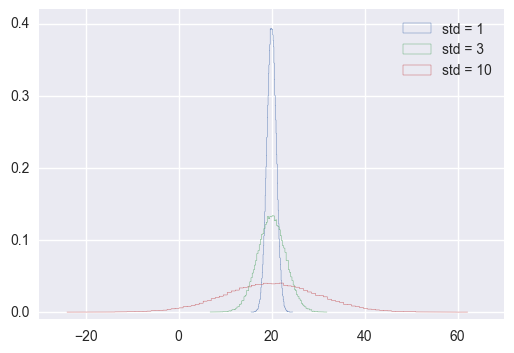

In [17]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)


# Make histograms
plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

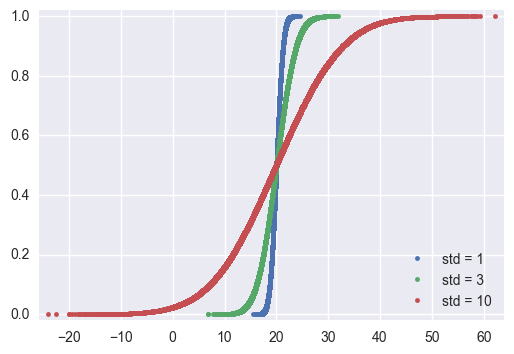

In [18]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std1, marker='.', linestyle='none')
plt.plot(x_std10, y_std1, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [19]:
belmont_no_outliers=np.array([ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ])

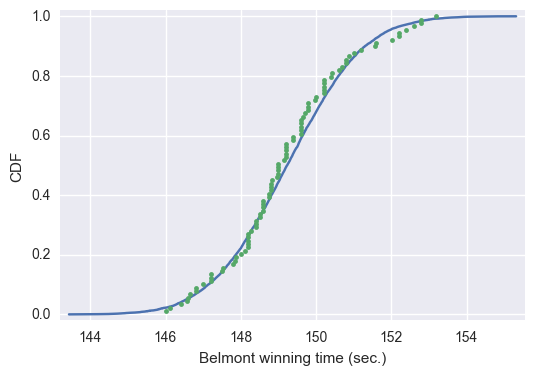

In [20]:
# Compute mean and standard deviation: mu, sigma
mu, sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [21]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples<=144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000591


In [22]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of first exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

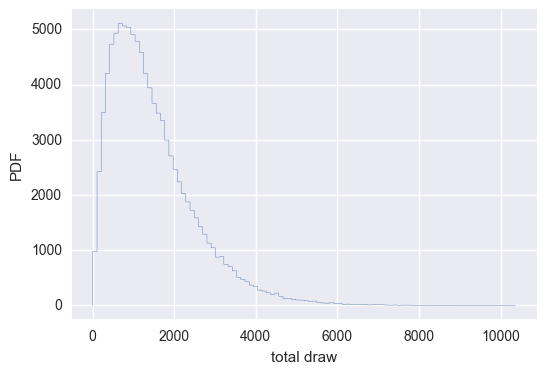

In [23]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)
#print(waiting_times)

# Make the histogram
plt.hist(waiting_times, bins=100,  histtype='step')
# plt.hist(waiting_times, bins=100, histtype='step', normed=True)


# Set margins and label axes
plt.margins(0.05)
plt.xlabel("total draw")
plt.ylabel("PDF")

# Show the plot
plt.show()